In [18]:

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.4.1


In [19]:
# collecting the data

In [20]:
import pandas_datareader as pdr

In [21]:
key = '5ffcd3105ca47e8a80025a1b01f36ea41546c8c7'

In [22]:
df = pdr.get_data_tiingo('OCGN' , api_key = key)

In [23]:
df.to_csv('AAPL1.csv')

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('AAPL1.csv')

In [26]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,OCGN,2016-05-09 00:00:00+00:00,1.57,1.8300,1.5400,1.60,10973,94.2,109.800,92.400,96.0,182,0.0,1.0
1,OCGN,2016-05-10 00:00:00+00:00,1.39,1.7399,1.3900,1.67,64005,83.4,104.394,83.400,100.2,1066,0.0,1.0
2,OCGN,2016-05-11 00:00:00+00:00,1.43,1.6200,1.4117,1.59,30813,85.8,97.200,84.702,95.4,513,0.0,1.0
3,OCGN,2016-05-12 00:00:00+00:00,1.80,2.0600,1.3900,1.39,228317,108.0,123.600,83.400,83.4,3805,0.0,1.0
4,OCGN,2016-05-13 00:00:00+00:00,1.88,2.0000,1.8101,1.93,47523,112.8,120.000,108.606,115.8,792,0.0,1.0


In [27]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,OCGN,2021-04-30 00:00:00+00:00,12.67,13.37,11.390,11.45,164400936,12.67,13.37,11.390,11.45,164400936,0.0,1.0
1254,OCGN,2021-05-03 00:00:00+00:00,15.68,16.20,13.830,13.93,282311352,15.68,16.20,13.830,13.93,282311352,0.0,1.0
1255,OCGN,2021-05-04 00:00:00+00:00,12.51,13.84,11.865,13.84,90958408,12.51,13.84,11.865,13.84,90958408,0.0,1.0
1256,OCGN,2021-05-05 00:00:00+00:00,10.91,13.75,10.880,12.89,95972538,10.91,13.75,10.880,12.89,95972538,0.0,1.0
1257,OCGN,2021-05-06 00:00:00+00:00,9.58,10.53,9.020,9.61,83460456,9.58,10.53,9.020,9.61,83460456,0.0,1.0


In [28]:
df.shape

(1258, 14)

In [29]:
#df1= df.reset_index()['close']

In [30]:
df1= df['close']

In [31]:
df1

0        1.57
1        1.39
2        1.43
3        1.80
4        1.88
        ...  
1253    12.67
1254    15.68
1255    12.51
1256    10.91
1257     9.58
Name: close, Length: 1258, dtype: float64

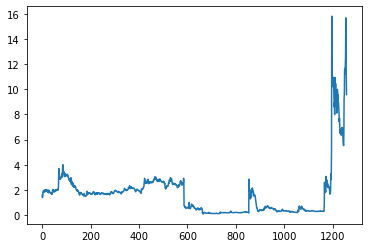

In [32]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [33]:
df1.shape

(1258,)

In [34]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [35]:
df1

array([[0.09423977],
       [0.08279056],
       [0.08533483],
       ...,
       [0.7900977 ],
       [0.68832689],
       [0.6037299 ]])

In [36]:
df1.shape

(1258, 1)

In [37]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data , test_data = df1[0:training_size , :],df1[training_size : len(df1) , :1]

In [38]:
train_data.shape

(817, 1)

In [39]:
test_data.shape

(441, 1)

In [40]:
t = df1[training_size : len(df1) , :]

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [42]:
t.shape

(441, 1)

In [43]:
import numpy 
def create_dataset(dataset , time_stemp = 1):
    dataX , dataY = [] , []
    for i in range(len(dataset)- time_stemp-1):
        a = dataset[i:(i+time_stemp) , 0]
        dataX.append(a)
        dataY.append(dataset[i + time_stemp , 0])
    return numpy.array(dataX) , numpy.array(dataY)

In [44]:
len(train_data)

817

In [45]:
time_stemp = 100
X_train , Y_train = create_dataset(train_data , time_stemp)
X_test , Y_test = create_dataset(test_data , time_stemp)

In [46]:
X_train.shape , Y_train.shape 

((716, 100), (716,))

In [47]:
#reshape input into samples , timestemp , features  which is required in LSTM
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test  = X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

In [48]:
model = Sequential()
model.add(LSTM(200 ,return_sequences = True , input_shape = (100 ,1 ) ))
model.add(LSTM(200 ,return_sequences = True ))
model.add(LSTM(200))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error' , optimizer = 'adam' )



In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 200)          161600    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 200)          320800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 803,401
Trainable params: 803,401
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(X_train , Y_train , validation_data = (X_test , Y_test) , epochs = 100 , batch_size = 128 , verbose = 1)

Epoch 1/100
6/6 [==============================] - 19s 2s/step - loss: 0.0070 - val_loss: 0.0350
Epoch 2/100
6/6 [==============================] - 11s 2s/step - loss: 0.0026 - val_loss: 0.0169
Epoch 3/100
6/6 [==============================] - 12s 2s/step - loss: 0.0012 - val_loss: 0.0169
Epoch 4/100
6/6 [==============================] - 12s 2s/step - loss: 5.5106e-04 - val_loss: 0.0107
Epoch 5/100
6/6 [==============================] - 14s 2s/step - loss: 3.8438e-04 - val_loss: 0.0105
Epoch 6/100
6/6 [==============================] - 17s 3s/step - loss: 2.5022e-04 - val_loss: 0.0118
Epoch 7/100
6/6 [==============================] - 15s 2s/step - loss: 2.9383e-04 - val_loss: 0.0107
Epoch 8/100
6/6 [==============================] - 12s 2s/step - loss: 2.4913e-04 - val_loss: 0.0102
Epoch 9/100
6/6 [==============================] - 13s 2s/step - loss: 2.6593e-04 - val_loss: 0.0098
Epoch 10/100
6/6 [==============================] - 10s 2s/step - loss: 2.3770e-04 - val_loss: 0.0104
E

6/6 [==============================] - 9s 2s/step - loss: 1.1883e-04 - val_loss: 0.0055
Epoch 83/100
6/6 [==============================] - 9s 2s/step - loss: 1.3842e-04 - val_loss: 0.0055
Epoch 84/100
6/6 [==============================] - 9s 2s/step - loss: 9.5131e-05 - val_loss: 0.0054
Epoch 85/100
6/6 [==============================] - 9s 2s/step - loss: 9.1788e-05 - val_loss: 0.0058
Epoch 86/100
6/6 [==============================] - 11s 2s/step - loss: 1.1831e-04 - val_loss: 0.0054
Epoch 87/100
6/6 [==============================] - 11s 2s/step - loss: 8.4798e-05 - val_loss: 0.0057
Epoch 88/100
6/6 [==============================] - 9s 2s/step - loss: 9.2800e-05 - val_loss: 0.0055
Epoch 89/100
6/6 [==============================] - 9s 2s/step - loss: 9.8039e-05 - val_loss: 0.0053
Epoch 90/100
6/6 [==============================] - 9s 2s/step - loss: 1.1080e-04 - val_loss: 0.0052
Epoch 91/100
6/6 [==============================] - 10s 2s/step - loss: 8.4195e-05 - val_loss: 0.0057


In [51]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [52]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [53]:
import math

In [54]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train ,train_predict ))

1.6619777744230126

In [55]:
math.sqrt(mean_squared_error(Y_test ,test_predict ))

3.158805178633443

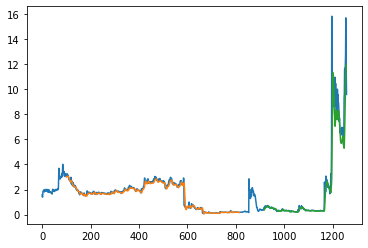

In [56]:
loop_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[loop_back:len(train_predict)+loop_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(loop_back*2)+1 :len(df1)-1 , :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [57]:
trainPredictPlot[loop_back:len(train_predict)+loop_back, :] = train_predict

In [58]:
testPredictPlot[len(train_predict)+(loop_back*2)+1 :len(df1)-1 , :] = test_predict

In [59]:
testPredictPlot[len(train_predict)+(loop_back*2)+1 :len(df1)-1 , :]

array([[ 0.37903503],
       [ 0.40337417],
       [ 0.43623897],
       [ 0.46728447],
       [ 0.49404886],
       [ 0.53121442],
       [ 0.56911618],
       [ 0.59557015],
       [ 0.6166876 ],
       [ 0.62835437],
       [ 0.62607503],
       [ 0.61560273],
       [ 0.60953087],
       [ 0.61388481],
       [ 0.62977731],
       [ 0.64768499],
       [ 0.66437453],
       [ 0.67660815],
       [ 0.68059325],
       [ 0.66903949],
       [ 0.65056896],
       [ 0.62754977],
       [ 0.59849179],
       [ 0.56778574],
       [ 0.53953409],
       [ 0.52078843],
       [ 0.51171798],
       [ 0.50935894],
       [ 0.50842452],
       [ 0.51284772],
       [ 0.52686518],
       [ 0.54258746],
       [ 0.55469579],
       [ 0.56222707],
       [ 0.56272876],
       [ 0.55715513],
       [ 0.54883063],
       [ 0.53776956],
       [ 0.52530634],
       [ 0.50832802],
       [ 0.48401982],
       [ 0.45612547],
       [ 0.4343009 ],
       [ 0.42472821],
       [ 0.42707309],
       [ 0

In [123]:
test_predict

array([[256.28897 ],
       [257.7256  ],
       [259.2335  ],
       [260.98056 ],
       [263.2759  ],
       [265.85684 ],
       [268.18088 ],
       [269.90433 ],
       [270.81534 ],
       [271.47028 ],
       [272.05048 ],
       [273.17557 ],
       [274.7142  ],
       [276.49866 ],
       [278.42065 ],
       [280.93097 ],
       [283.36594 ],
       [285.51132 ],
       [286.9543  ],
       [288.1303  ],
       [289.8309  ],
       [292.0064  ],
       [294.98465 ],
       [297.7604  ],
       [299.56763 ],
       [300.65955 ],
       [301.5709  ],
       [302.12534 ],
       [302.39648 ],
       [302.59402 ],
       [302.63553 ],
       [301.40665 ],
       [300.07098 ],
       [299.93015 ],
       [300.98245 ],
       [301.0556  ],
       [299.64404 ],
       [298.37958 ],
       [298.17828 ],
       [299.47342 ],
       [301.19522 ],
       [302.85947 ],
       [303.90997 ],
       [305.12466 ],
       [306.27573 ],
       [307.1733  ],
       [307.00555 ],
       [306.3

In [60]:
len(test_data)

441

In [61]:
test_data.shape

(441, 1)

In [63]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [64]:
temp_input = list(x_input)


In [65]:
temp_input = temp_input[0].tolist()

In [66]:
temp_input

[0.01377086301648687,
 0.013147516792183999,
 0.013274730307347852,
 0.013459189904335435,
 0.013414665174028088,
 0.01304574598005292,
 0.013077549358843884,
 0.045593323834724205,
 0.1597547323427641,
 0.10632505597394667,
 0.13749236718909016,
 0.13240382658253613,
 0.11968247506615104,
 0.11077752900468146,
 0.18964990840626908,
 0.17056788113169144,
 0.16039079991858335,
 0.1724760838591492,
 0.1654793405251374,
 0.15275798900875232,
 0.13622023203745168,
 0.15339405658457156,
 0.1330398941583554,
 0.13558416446163243,
 0.14321697537146347,
 0.13622023203745168,
 0.13749236718909016,
 0.1330398941583554,
 0.12667921840016283,
 0.11650213718705475,
 0.09996438021575411,
 0.1101414614288622,
 0.10696112354976593,
 0.10950539385304295,
 0.20173519234683493,
 0.17311215143496847,
 0.20109912477101569,
 0.3283126399348667,
 1.0,
 0.7964583757378385,
 0.6463464278444943,
 0.6934154284551192,
 0.648254630571952,
 0.6915072257276614,
 0.6450742926928558,
 0.6412578872379402,
 0.6476185629

In [67]:
len(temp_input)

100

In [68]:
from numpy import array

In [69]:
lst_output = []
n_steps = 100 
i = 0 
while(i<30):
    
    
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("day input".format(i , x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1 , n_steps , 1))
        print(x_input)
        yhat = model.predict(x_input , verbose = 0)
        print("day output".format(i , yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i= i+1
    else:
        x_input = x_input.reshape((1, n_steps , 1))
        print(x_input.shape)
        yhat = model.predict(x_input , verbose =0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i= i+1
        
print(lst_output)
        

(1, 100, 1)
[0.69157535]
101
day input
[[[0.01314752]
  [0.01327473]
  [0.01345919]
  [0.01341467]
  [0.01304575]
  [0.01307755]
  [0.04559332]
  [0.15975473]
  [0.10632506]
  [0.13749237]
  [0.13240383]
  [0.11968248]
  [0.11077753]
  [0.18964991]
  [0.17056788]
  [0.1603908 ]
  [0.17247608]
  [0.16547934]
  [0.15275799]
  [0.13622023]
  [0.15339406]
  [0.13303989]
  [0.13558416]
  [0.14321698]
  [0.13622023]
  [0.13749237]
  [0.13303989]
  [0.12667922]
  [0.11650214]
  [0.09996438]
  [0.11014146]
  [0.10696112]
  [0.10950539]
  [0.20173519]
  [0.17311215]
  [0.20109912]
  [0.32831264]
  [1.        ]
  [0.79645838]
  [0.64634643]
  [0.69341543]
  [0.64825463]
  [0.69150723]
  [0.64507429]
  [0.64125789]
  [0.64761856]
  [0.5782872 ]
  [0.54075921]
  [0.56238551]
  [0.50323122]
  [0.69087116]
  [0.63171687]
  [0.60500204]
  [0.65970385]
  [0.56492978]
  [0.55030022]
  [0.54330348]
  [0.55284449]
  [0.51022797]
  [0.60500204]
  [0.63044474]
  [0.62408406]
  [0.57510686]
  [0.6018217 ]
 

day output
day input
[[[0.10632506]
  [0.13749237]
  [0.13240383]
  [0.11968248]
  [0.11077753]
  [0.18964991]
  [0.17056788]
  [0.1603908 ]
  [0.17247608]
  [0.16547934]
  [0.15275799]
  [0.13622023]
  [0.15339406]
  [0.13303989]
  [0.13558416]
  [0.14321698]
  [0.13622023]
  [0.13749237]
  [0.13303989]
  [0.12667922]
  [0.11650214]
  [0.09996438]
  [0.11014146]
  [0.10696112]
  [0.10950539]
  [0.20173519]
  [0.17311215]
  [0.20109912]
  [0.32831264]
  [1.        ]
  [0.79645838]
  [0.64634643]
  [0.69341543]
  [0.64825463]
  [0.69150723]
  [0.64507429]
  [0.64125789]
  [0.64761856]
  [0.5782872 ]
  [0.54075921]
  [0.56238551]
  [0.50323122]
  [0.69087116]
  [0.63171687]
  [0.60500204]
  [0.65970385]
  [0.56492978]
  [0.55030022]
  [0.54330348]
  [0.55284449]
  [0.51022797]
  [0.60500204]
  [0.63044474]
  [0.62408406]
  [0.57510686]
  [0.6018217 ]
  [0.56047731]
  [0.56174944]
  [0.5369428 ]
  [0.50831976]
  [0.4663393 ]
  [0.4841492 ]
  [0.44789334]
  [0.40782109]
  [0.42372278]
  [0

day output
day input
[[[0.17056788]
  [0.1603908 ]
  [0.17247608]
  [0.16547934]
  [0.15275799]
  [0.13622023]
  [0.15339406]
  [0.13303989]
  [0.13558416]
  [0.14321698]
  [0.13622023]
  [0.13749237]
  [0.13303989]
  [0.12667922]
  [0.11650214]
  [0.09996438]
  [0.11014146]
  [0.10696112]
  [0.10950539]
  [0.20173519]
  [0.17311215]
  [0.20109912]
  [0.32831264]
  [1.        ]
  [0.79645838]
  [0.64634643]
  [0.69341543]
  [0.64825463]
  [0.69150723]
  [0.64507429]
  [0.64125789]
  [0.64761856]
  [0.5782872 ]
  [0.54075921]
  [0.56238551]
  [0.50323122]
  [0.69087116]
  [0.63171687]
  [0.60500204]
  [0.65970385]
  [0.56492978]
  [0.55030022]
  [0.54330348]
  [0.55284449]
  [0.51022797]
  [0.60500204]
  [0.63044474]
  [0.62408406]
  [0.57510686]
  [0.6018217 ]
  [0.56047731]
  [0.56174944]
  [0.5369428 ]
  [0.50831976]
  [0.4663393 ]
  [0.4841492 ]
  [0.44789334]
  [0.40782109]
  [0.42372278]
  [0.42626705]
  [0.42054244]
  [0.41227356]
  [0.39828007]
  [0.43262772]
  [0.43389986]
  [0

day output
day input
[[[0.15339406]
  [0.13303989]
  [0.13558416]
  [0.14321698]
  [0.13622023]
  [0.13749237]
  [0.13303989]
  [0.12667922]
  [0.11650214]
  [0.09996438]
  [0.11014146]
  [0.10696112]
  [0.10950539]
  [0.20173519]
  [0.17311215]
  [0.20109912]
  [0.32831264]
  [1.        ]
  [0.79645838]
  [0.64634643]
  [0.69341543]
  [0.64825463]
  [0.69150723]
  [0.64507429]
  [0.64125789]
  [0.64761856]
  [0.5782872 ]
  [0.54075921]
  [0.56238551]
  [0.50323122]
  [0.69087116]
  [0.63171687]
  [0.60500204]
  [0.65970385]
  [0.56492978]
  [0.55030022]
  [0.54330348]
  [0.55284449]
  [0.51022797]
  [0.60500204]
  [0.63044474]
  [0.62408406]
  [0.57510686]
  [0.6018217 ]
  [0.56047731]
  [0.56174944]
  [0.5369428 ]
  [0.50831976]
  [0.4663393 ]
  [0.4841492 ]
  [0.44789334]
  [0.40782109]
  [0.42372278]
  [0.42626705]
  [0.42054244]
  [0.41227356]
  [0.39828007]
  [0.43262772]
  [0.43389986]
  [0.4370802 ]
  [0.4192703 ]
  [0.42117851]
  [0.43326379]
  [0.38555872]
  [0.36202422]
  [0

day output
day input
[[[0.13303989]
  [0.12667922]
  [0.11650214]
  [0.09996438]
  [0.11014146]
  [0.10696112]
  [0.10950539]
  [0.20173519]
  [0.17311215]
  [0.20109912]
  [0.32831264]
  [1.        ]
  [0.79645838]
  [0.64634643]
  [0.69341543]
  [0.64825463]
  [0.69150723]
  [0.64507429]
  [0.64125789]
  [0.64761856]
  [0.5782872 ]
  [0.54075921]
  [0.56238551]
  [0.50323122]
  [0.69087116]
  [0.63171687]
  [0.60500204]
  [0.65970385]
  [0.56492978]
  [0.55030022]
  [0.54330348]
  [0.55284449]
  [0.51022797]
  [0.60500204]
  [0.63044474]
  [0.62408406]
  [0.57510686]
  [0.6018217 ]
  [0.56047731]
  [0.56174944]
  [0.5369428 ]
  [0.50831976]
  [0.4663393 ]
  [0.4841492 ]
  [0.44789334]
  [0.40782109]
  [0.42372278]
  [0.42626705]
  [0.42054244]
  [0.41227356]
  [0.39828007]
  [0.43262772]
  [0.43389986]
  [0.4370802 ]
  [0.4192703 ]
  [0.42117851]
  [0.43326379]
  [0.38555872]
  [0.36202422]
  [0.35311928]
  [0.34548646]
  [0.40782109]
  [0.58528394]
  [0.60691024]
  [0.73157948]
  [0

In [70]:
day_new = np.arange(1,100)
day_pred = np.arange(101,131)

In [71]:
 j=scaler.inverse_transform(lst_output)

In [72]:
j

array([[10.961071  ],
       [10.07078747],
       [ 9.20864166],
       [ 8.4081473 ],
       [ 7.66821598],
       [ 6.98497193],
       [ 6.35901535],
       [ 5.79393901],
       [ 5.29340456],
       [ 4.85922101],
       [ 4.49066448],
       [ 4.18462106],
       [ 3.93611062],
       [ 3.73890955],
       [ 3.58612047],
       [ 3.47063726],
       [ 3.38550562],
       [ 3.32417956],
       [ 3.28070418],
       [ 3.24982575],
       [ 3.22704884],
       [ 3.20865535],
       [ 3.19167967],
       [ 3.17387046],
       [ 3.15361969],
       [ 3.12988789],
       [ 3.10212126],
       [ 3.07016214],
       [ 3.03416771],
       [ 2.9945264 ]])

In [98]:
day_new.shape

(200,)

In [99]:
lst_output.shape

AttributeError: 'list' object has no attribute 'shape'

In [94]:
df3 =df1.tolist()

In [95]:
df3.extend(lst_output)

In [96]:
len(df1)

1257

ValueError: x and y must have same first dimension, but have shapes (0,) and (30, 1)

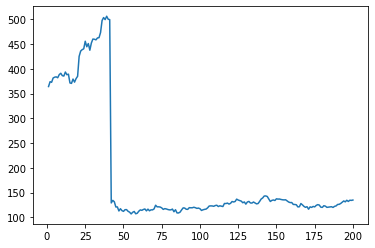

In [106]:
plt.plot(day_new , scaler.inverse_transform(df1[1057:]))
plt.plot(day_pred , scaler.inverse_transform(lst_output))

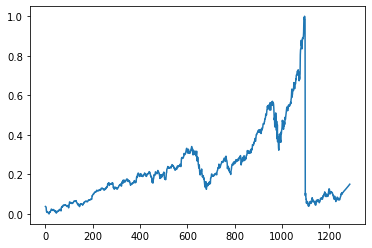

In [130]:
plt.plot(df3[1:])